<a href="https://colab.research.google.com/github/SridharaniKatipally/Learnflow-DataScience/blob/main/Social_Network_Analysis_for_Online_Communities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import necessary libraries
import pandas as pd
import zipfile
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Define the path to the zip file
zip_path = '/content/archive (6).zip'



In [9]:
# Extract the files from the zip archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [10]:
# Load the specific CSV files
edges_path = '/content/InputFileEdges.csv'
nodes_path = '/content/InputFileNodes.csv'


In [15]:
edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv(nodes_path)

# Display the first few rows of the edges dataframe
print(edges_df.head())
print(edges_df.columns)

# Display the first few rows of the nodes dataframe and its columns
print(nodes_df.head())
print(nodes_df.columns)



  from   to  weight       type
0  s01  s02      10  hyperlink
1  s01  s02      12  hyperlink
2  s01  s03      22  hyperlink
3  s01  s04      21  hyperlink
4  s04  s11      22    mention
Index(['from', 'to', 'weight', 'type'], dtype='object')
    id                media  media.type type.label  audience.size
0  s01             NY Times           1  Newspaper             20
1  s02      Washington Post           1  Newspaper             25
2  s03  Wall Street Journal           1  Newspaper             30
3  s04            USA Today           1  Newspaper             32
4  s05             LA Times           1  Newspaper             20
Index(['id', 'media', 'media.type', 'type.label', 'audience.size'], dtype='object')


In [16]:
# Use appropriate column names for creating the network graph
# Assuming 'source' and 'target' columns are named differently in the dataset
# Update these column names based on the actual column names from the print statements
source_col = 'from'  # Update based on actual column name
target_col = 'to'    # Update based on actual column name

In [17]:
# Create the network graph from the edge list
G = nx.from_pandas_edgelist(edges_df, source_col, target_col, edge_attr=True)

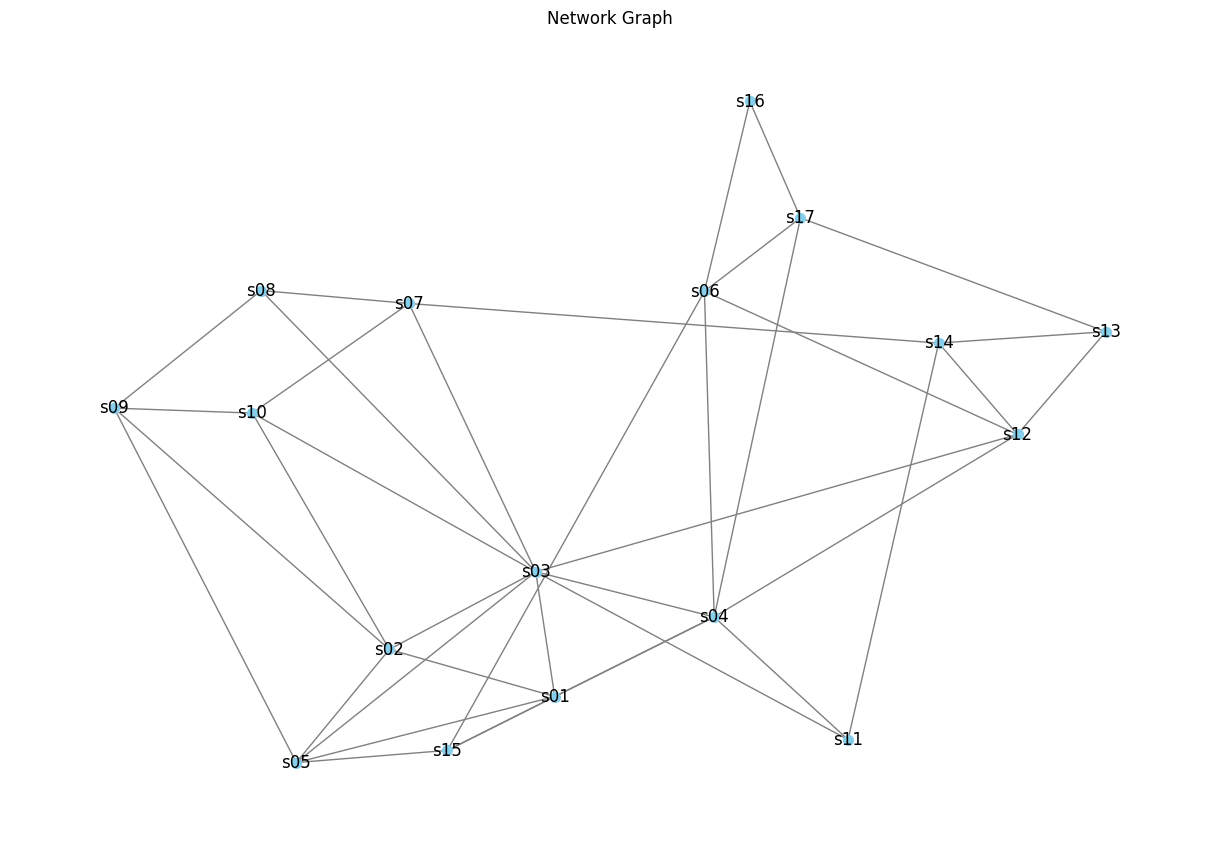

In [18]:
# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', edge_color='gray')
plt.title('Network Graph')
plt.show()

In [19]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

In [20]:
# Create a dataframe to store centrality measures
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
})


     Degree Centrality  Betweenness Centrality  Closeness Centrality  \
s01             0.3125                0.039147              0.533333   
s02             0.3125                0.025992              0.484848   
s03             0.5625                0.340417              0.666667   
s04             0.4375                0.195665              0.615385   
s11             0.1875                0.017917              0.516129   

     Eigenvector Centrality  
s01                0.319141  
s02                0.291034  
s03                0.448547  
s04                0.352833  
s11                0.186928  


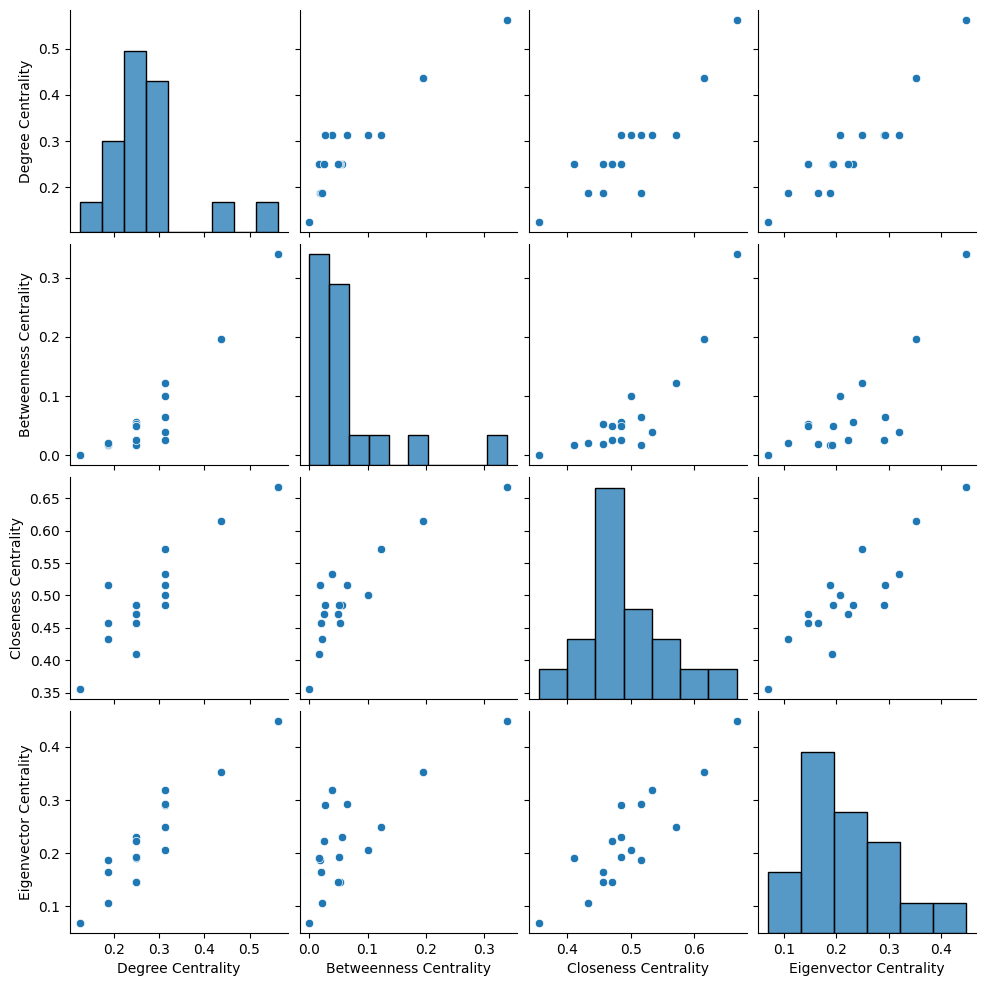

In [21]:
# Display the centrality measures
print(centrality_df.head())

# Plot centrality measures
sns.pairplot(centrality_df)
plt.show()

In [22]:
# Identify influential users (top 10 by each centrality measure)
top_degree = centrality_df['Degree Centrality'].nlargest(10)
top_betweenness = centrality_df['Betweenness Centrality'].nlargest(10)
top_closeness = centrality_df['Closeness Centrality'].nlargest(10)
top_eigenvector = centrality_df['Eigenvector Centrality'].nlargest(10)

print("Top 10 Influential Users by Degree Centrality:")
print(top_degree)
print("\nTop 10 Influential Users by Betweenness Centrality:")
print(top_betweenness)
print("\nTop 10 Influential Users by Closeness Centrality:")
print(top_closeness)
print("\nTop 10 Influential Users by Eigenvector Centrality:")
print(top_eigenvector)

Top 10 Influential Users by Degree Centrality:
s03    0.5625
s04    0.4375
s01    0.3125
s02    0.3125
s05    0.3125
s06    0.3125
s12    0.3125
s15    0.2500
s17    0.2500
s09    0.2500
Name: Degree Centrality, dtype: float64

Top 10 Influential Users by Betweenness Centrality:
s03    0.340417
s04    0.195665
s12    0.122718
s06    0.100188
s05    0.065456
s15    0.056210
s17    0.052937
s07    0.050278
s14    0.049167
s01    0.039147
Name: Betweenness Centrality, dtype: float64

Top 10 Influential Users by Closeness Centrality:
s03    0.666667
s04    0.615385
s12    0.571429
s01    0.533333
s11    0.516129
s05    0.516129
s06    0.500000
s02    0.484848
s15    0.484848
s07    0.484848
Name: Closeness Centrality, dtype: float64

Top 10 Influential Users by Eigenvector Centrality:
s03    0.448547
s04    0.352833
s01    0.319141
s05    0.292553
s02    0.291034
s12    0.248810
s15    0.231303
s10    0.222095
s06    0.206888
s07    0.193619
Name: Eigenvector Centrality, dtype: float64


In [23]:
# Detecting community structures using the Girvan-Newman algorithm
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(G)
first_level_communities = next(communities)
community_dict = {node: cid for cid, community in enumerate(first_level_communities) for node in community}


In [24]:
# Add community information to the centrality dataframe
centrality_df['Community'] = centrality_df.index.map(community_dict)


In [25]:
# Display the first few rows with community information
print(centrality_df.head())

     Degree Centrality  Betweenness Centrality  Closeness Centrality  \
s01             0.3125                0.039147              0.533333   
s02             0.3125                0.025992              0.484848   
s03             0.5625                0.340417              0.666667   
s04             0.4375                0.195665              0.615385   
s11             0.1875                0.017917              0.516129   

     Eigenvector Centrality  Community  
s01                0.319141          0  
s02                0.291034          0  
s03                0.448547          0  
s04                0.352833          1  
s11                0.186928          1  


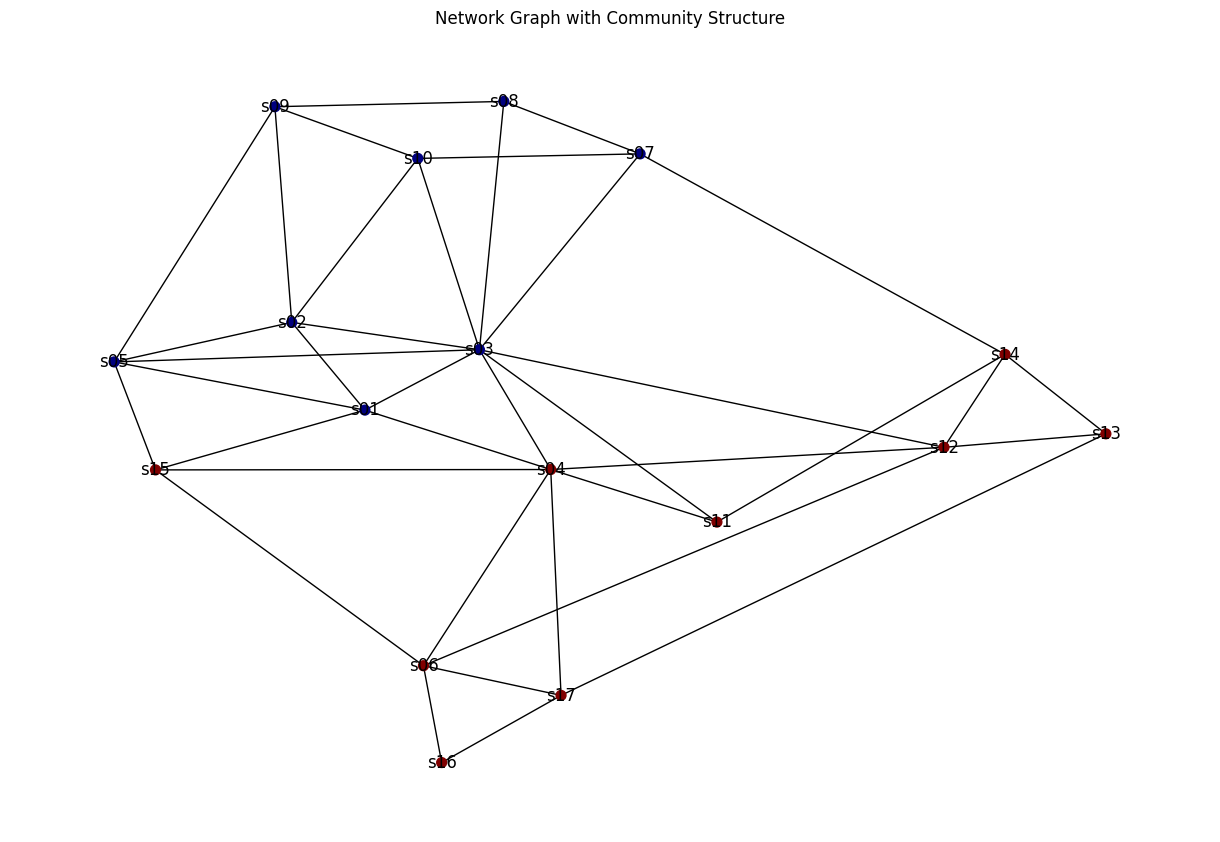

In [26]:
# Plot the network with community structure
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
colors = [community_dict[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=50, cmap=plt.cm.jet)
plt.title('Network Graph with Community Structure')
plt.show()